# PREDICTION MODEL SiteEnergyUse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import datetime as dt
import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from scipy.stats import kruskal
import re
import missingno as msno
from tqdm import tqdm
import locale
import os #intéragir avec le système d'exploitation
import zipfile #lecture et écriture pour les fichiers zip
import urllib #gestion des url
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim
import plotly.express as px
from geopy.distance import geodesic
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import time
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.utils import shuffle
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install shap
!pip install shap --upgrade
import shap

## Initialisation

In [2]:
data_model_2 = pd.read_csv('data_model_2.csv')

In [3]:
pd.set_option('display.max_column',46)
pd.set_option('display.max_row',150)

In [4]:
data_model_2.head()

,Latitude,Longitude,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s)(%),BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,AgeBuilt,Source_principale,Source_secondaire,Source_tertiaire,SiteEnergyUse(kBtu)
0,47.61220,-122.33799,88434.0,0.0,0.0,100.000,NonResidential,Hotel,98101.0,7,Downtown,1.0,12,Hotel,None,None,Compliant,89,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),7226362.5
1,47.61317,-122.33393,83880.0,15064.0,4622.0,85.455,NonResidential,Hotel,98101.0,7,Downtown,1.0,11,Hotel,Parking,Restaurant,Compliant,20,NaturalGas(kBtu),Electricity(kBtu),None,8387933.0
2,47.61393,-122.33810,756493.0,0.0,0.0,79.425,NonResidential,Hotel,98101.0,7,Downtown,1.0,41,Hotel,None,None,Compliant,47,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),72587024.0
3,47.61412,-122.33664,61320.0,0.0,0.0,100.000,NonResidential,Hotel,98101.0,7,Downtown,1.0,10,Hotel,None,None,Compliant,90,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),6794584.0
4,47.61375,-122.34047,123445.0,68009.0,0.0,64.688,NonResidential,Hotel,98121.0,7,Downtown,1.0,18,Hotel,Parking,Swimming Pool,Compliant,36,NaturalGas(kBtu),Electricity(kBtu),None,14172606.0


In [5]:
col_model_2_quantitative = ['Latitude', 'Longitude', 'LargestPropertyUseTypeGFA', 
                            'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
                             'PropertyGFABuilding(s)(%)']

col_model_2_categoriel = ['BuildingType','PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode',
                          'Neighborhood', 'NumberofBuildings',
                          'NumberofFloors','LargestPropertyUseType',
                          'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ComplianceStatus',
                         'AgeBuilt', 'Source_principale','Source_secondaire','Source_tertiaire']

In [6]:
print('Nbre colonne data_model_2 :', data_model_2.shape[1])
print('Nbre colonne col_model_2_quantitative :', len(col_model_2_quantitative))
print('Nbre colonne col_model_2_categoriel :', len(col_model_2_categoriel))

Nbre colonne data_model_2 : 22
Nbre colonne col_model_2_quantitative : 6
Nbre colonne col_model_2_categoriel : 15


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


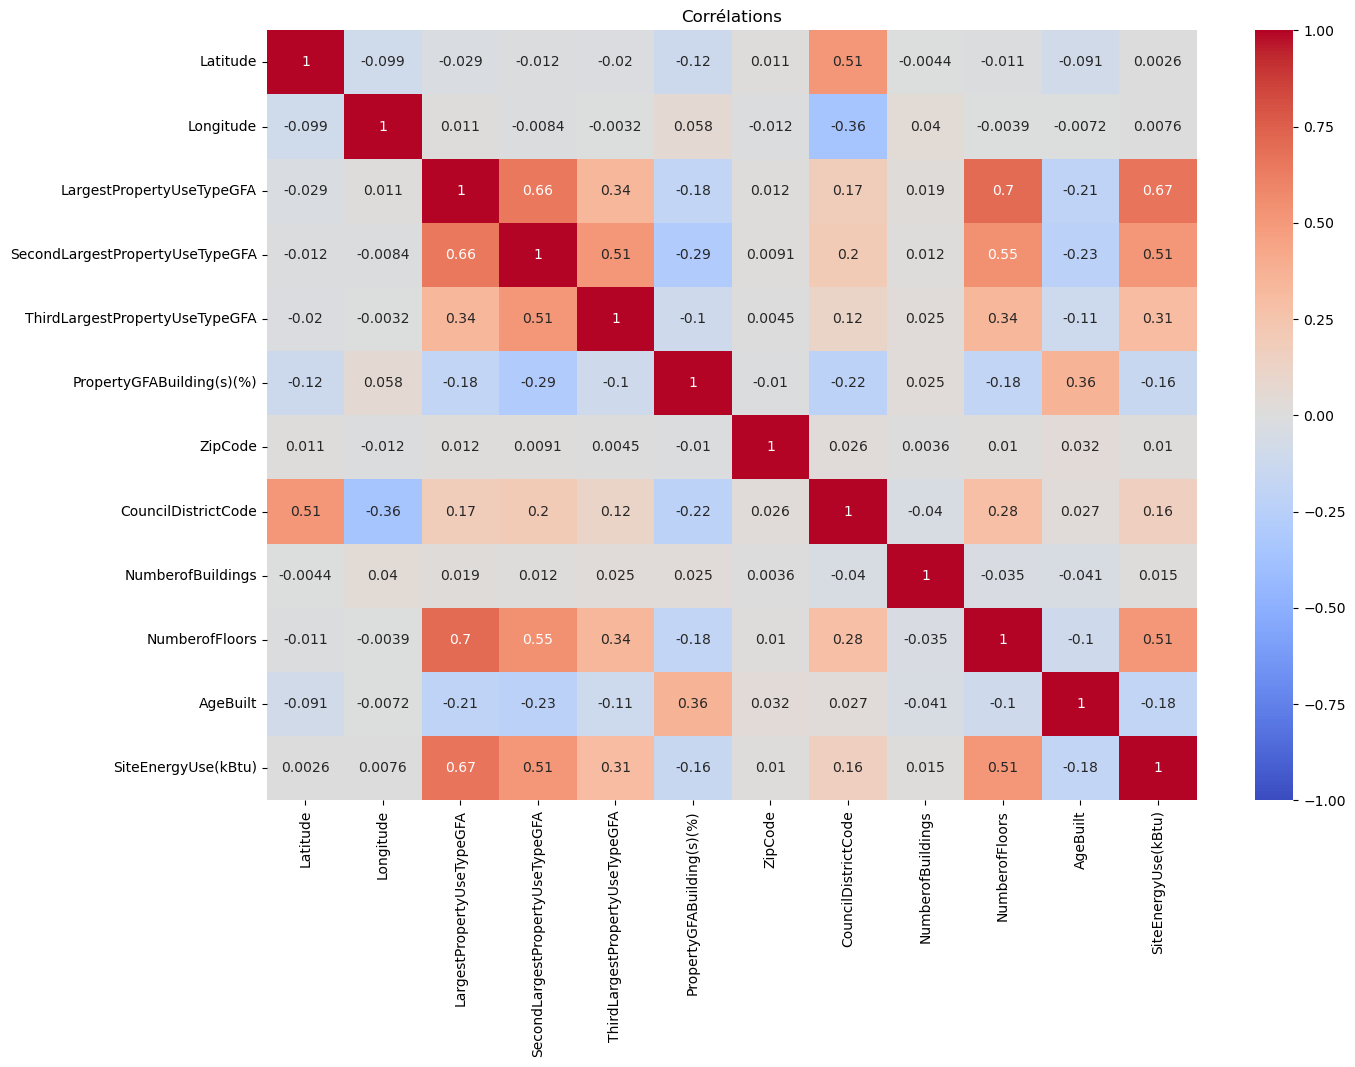

In [7]:
# Graphique heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(data_model_2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Corrélations')
plt.show()

In [8]:
data_model_2.dtypes

Latitude                           float64
Longitude                          float64
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
PropertyGFABuilding(s)(%)          float64
BuildingType                        object
PrimaryPropertyType                 object
ZipCode                            float64
CouncilDistrictCode                  int64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                       int64
LargestPropertyUseType              object
SecondLargestPropertyUseType        object
ThirdLargestPropertyUseType         object
ComplianceStatus                    object
AgeBuilt                             int64
Source_principale                   object
Source_secondaire                   object
Source_tertiaire                    object
SiteEnergyUse(kBtu)                float64
dtype: object

In [9]:
X = data_model_2.drop(['SiteEnergyUse(kBtu)'], axis=1)
y = data_model_2[['SiteEnergyUse(kBtu)']]
X, y = shuffle(X, y)

In [10]:
data_model_2.isnull().sum()

Latitude                           0
Longitude                          0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
PropertyGFABuilding(s)(%)          0
BuildingType                       0
PrimaryPropertyType                0
ZipCode                            0
CouncilDistrictCode                0
Neighborhood                       0
NumberofBuildings                  0
NumberofFloors                     0
LargestPropertyUseType             0
SecondLargestPropertyUseType       0
ThirdLargestPropertyUseType        0
ComplianceStatus                   0
AgeBuilt                           0
Source_principale                  0
Source_secondaire                  0
Source_tertiaire                   0
SiteEnergyUse(kBtu)                0
dtype: int64

## Fonctions

In [11]:
def cross_validation (pipeline_svm) :   
    mean_scores = []

    for i in range(2, 30):
        # Calculer le score R² en utilisant une validation croisée 
        cross_val_r2 = cross_val_score(pipeline_svm, X, y, scoring='r2', cv=i)

        # Calculer le score R² moyen
        mean_r2 = np.mean(cross_val_r2)

        # Stocker le score R² moyen dans la liste
        mean_scores.append(mean_r2)

    max_index = np.argmax(mean_scores)
    max_coords = (max_index + 2, mean_scores[max_index])

    # Créer un graphique des scores R² moyens en fonction de k
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(2, 30), y=mean_scores, marker='o')
    plt.scatter(*max_coords, color='red')  # Ajouter le point le plus haut en rouge
    plt.title('Score R² moyen en fonction du nombre de plis (k)')
    plt.xlabel('Nombre de plis (k)')
    plt.ylabel('Score R² moyen')
    plt.xticks(np.arange(2, 30, 2))

    # Afficher les coordonnées du point le plus haut
    plt.annotate(f'Coordonnées\n({max_coords[1]:.4f} ; {max_coords[0]:.0f})', max_coords,
                 textcoords="offset points", xytext=(0,-20), ha='center', color='red')

    plt.show()
    return max_coords 

In [12]:
def model_info (pipeline) :
    print('CrossValidation')
    print('--------------------------------------')
    # Afficher les scores R² pour chaque pli
    print(f"Scores R² pour chaque pli (k={max_coords[0]}): {cross_val_r2}")

    # Afficher le score R² moyen
    print(f"Score R² moyen (k={max_coords[0]}): {np.mean(cross_val_r2)}")


    y_train_predict = pipeline.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)
    print('\n') 
    print('La performance du modèle sur la base d\'apprentissage')
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est (RMSE) {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    print('\n')

    # model evaluation for testing set
    y_test_predict = pipeline.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est (RMSE) {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))

In [13]:
# Création du DataFrame pour stocker les résultats
best_model = pd.DataFrame(columns=['Algo','Parameters', 'R-squared', 'RMSE', 'MAE', 'Time'])

def model_summary(algo, pipeline, parameters):
    global best_model

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Faire des prédictions
    y_test_predict = pipeline.predict(X_test)

    # Calculer les métriques de performance
    r_squared = r2_score(y_test, y_test_predict)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    mae = mean_absolute_error(y_test, y_test_predict)
    
    # Calcul du temps écoulé
    elapsed_time = time.time() - start_time

    # Ajouter les résultats au DataFrame
    results = pd.DataFrame({'Algo': [algo],
                            'Parameters' : parameters,
                            'R-squared': [r_squared],
                            'RMSE': [rmse],
                            'MAE' : [mae],
                            'Time': [elapsed_time]})
    
    best_model = pd.concat([best_model, results], ignore_index=True)

    # Afficher les résultats
    display(best_model)

## Regression linéaire

### Encodage

**ENCODER**

Utilisation de OneHotEncoder afin de ne pas avoir de relation d'ordre entre les variables.

In [14]:
# Colonnes catégorielles
categorical_columns = col_model_2_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_2_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_2_categoriel),
    ],
    remainder='passthrough'
)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape
display(X_train.head())

,Latitude,Longitude,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s)(%),BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,AgeBuilt,Source_principale,Source_secondaire,Source_tertiaire
520,47.604538,-122.320328,26400.0,19200.0,17000.0,72.082,NonResidential,Mixed Use Property,98122.0,3,East,1.0,4,Other,Office,Parking,Compliant,12,Electricity(kBtu),NaturalGas(kBtu),None
23,47.615000,-122.330810,67224.0,0.0,0.0,100.000,NonResidential,Other,98101.0,7,Downtown,1.0,2,Automobile Dealership,None,None,Compliant,86,Electricity(kBtu),None,None
100,47.522540,-122.366270,67782.0,0.0,0.0,100.000,NonResidential,Retail Store,98126.0,1,Delridge,1.0,1,Retail Store,None,None,Compliant,51,NaturalGas(kBtu),Electricity(kBtu),None
1066,47.574660,-122.330890,40780.0,7500.0,0.0,100.000,NonResidential,Warehouse,98134.0,2,Greater Duwamish,1.0,1,Non-Refrigerated Warehouse,Office,None,Compliant,48,Electricity(kBtu),NaturalGas(kBtu),None
709,47.610980,-122.327660,39760.0,0.0,0.0,100.000,NonResidential,Small- and Mid-Sized Office,98101.0,3,East,1.0,4,Office,None,None,Compliant,91,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)


In [17]:
X_test.shape

(290, 21)

**DATA LEAKAGE**

- Aucune normalisation n'est effectuée avant la séparation du jeu de donnée.
- Les doublons ont été traité. 
- Les données concernant les relevés énergétiques ont été retiré de la base de donnée.

### Transformation

In [18]:
start_time = time.time() # Calcul temps 

# Transformation logarithmique

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Créer le pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Entraîner le modèle sur l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

elapsed_time = time.time() - start_time

### Validation croisée

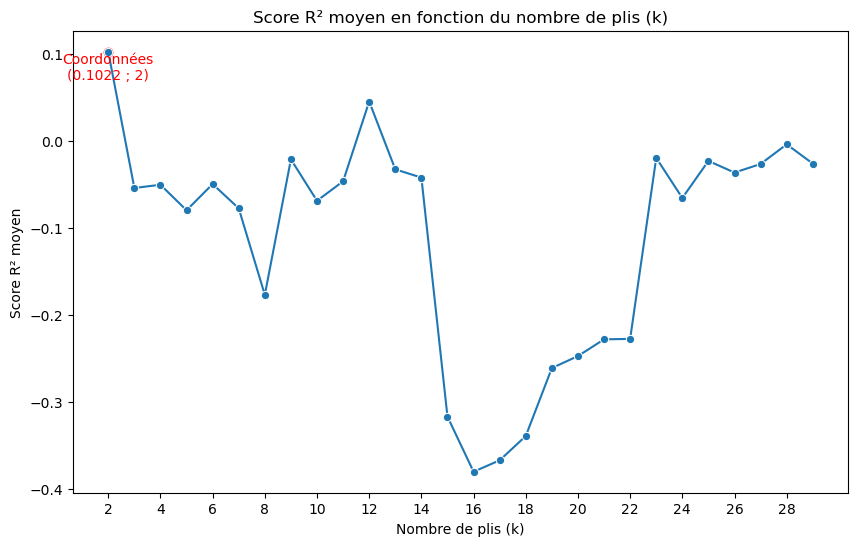

In [19]:
max_coords = cross_validation(pipeline)

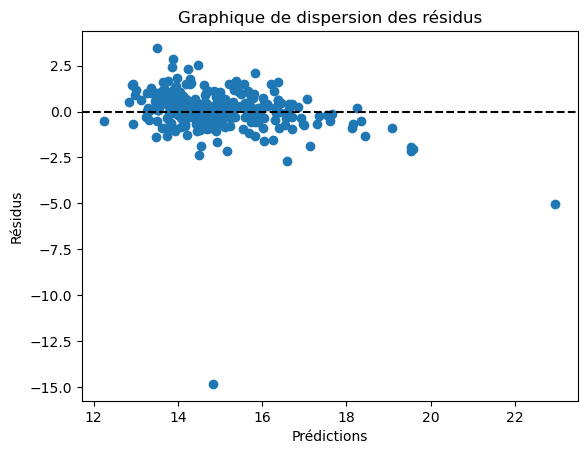

In [20]:
# Graphique de dispersion des résidus
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Graphique de dispersion des résidus')
plt.show()

### Evaluation

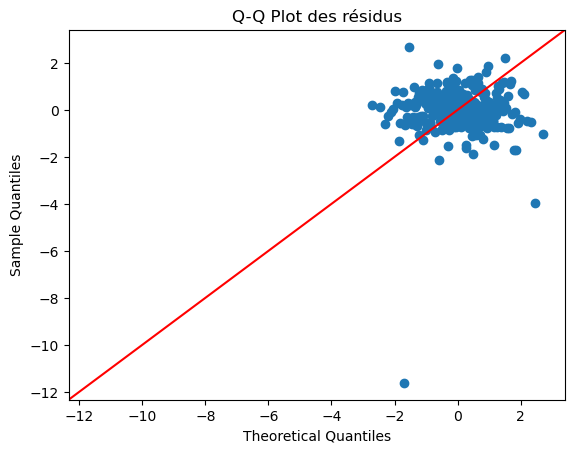

In [21]:
# Calculer les quantiles théoriques pour une distribution normale
residuals_std = (residuals - residuals.mean()) / residuals.std()
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals)))

# Créer le Q-Q plot
sm.qqplot(residuals_std, line='45')
plt.title('Q-Q Plot des résidus')
plt.show()

In [22]:
model_summary('Regression_linear', pipeline, 'MinMax')

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.324233,1.277442,0.743057,0.005352


**SYNTHESE**

- La première approche montre une distribution non normale, nous allons utiliser la validation croisée et la transformation logarithmique au vu de la formation des résidus.
- Le meilleur k-pli pour la validation croisée est à 2.

## ElasticNet

L'algorithme ElasticNet est une régression linéaire de régularisation qui permet d'éviter l'overfiting. Elle se base sur la régularisation L1 et L2 :
1. Gère la sélection des variables
2. Gère la multicolinéarité

### Encodage

In [23]:
X = data_model_2.drop(['SiteEnergyUse(kBtu)'], axis=1)
y = data_model_2[['SiteEnergyUse(kBtu)']]
X, y = shuffle(X, y)

In [24]:
# Colonnes catégorielles
categorical_columns = col_model_2_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), col_model_2_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_2_categoriel),
    ],
    remainder='passthrough'
)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

La meilleure transformation est la logarithmique.

In [26]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [27]:
# Créer le pipeline
pipeline_elastic = Pipeline([
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet(alpha=0.001, l1_ratio=0.09) )])

# Modèle Elastic Net
pipeline_elastic.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_elastic.predict(X_test)

### Optimisation

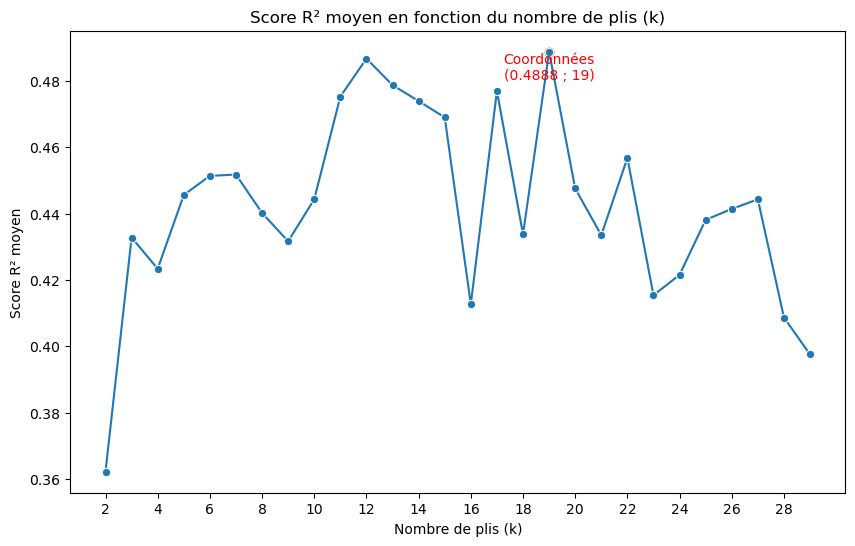

In [28]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
cross_val_r2 = cross_val_score(pipeline_elastic, X, y, scoring='r2', cv=max_coords[0])
max_coords = cross_validation(pipeline_elastic)

In [29]:
# Grille de valeurs d'alpha et l1_ratio à explorer
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

# Recherche d'hyperparamètres
pipeline_elastic_grid = Pipeline([
    ('preprocessor', preprocessor),
    ('grid', GridSearchCV(estimator=ElasticNet(), param_grid=param_grid, scoring='r2', cv=max_coords[0]))])

pipeline_elastic_grid.fit(X_train, y_train)

# Résultats
best_params = pipeline_elastic_grid.named_steps['grid'].best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9}


In [30]:
model_summary('ElasticNet', pipeline_elastic, '{alpha : 0.001, l1_ratio: 0,9}')

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.324233,1.277442,0.743057,0.005352
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0,9}",0.456884,0.943501,0.686885,0.004971


## SVM

Algorithme de classification et régression qui se base sur les hyperplans.

### Encodage

In [31]:
X = data_model_2.drop(['SiteEnergyUse(kBtu)'], axis=1)
y = data_model_2[['SiteEnergyUse(kBtu)']]
X, y = shuffle(X, y)

In [32]:
# Colonnes catégorielles
categorical_columns = col_model_2_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_2_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_2_categoriel),
    ],
    remainder='passthrough'
)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

In [34]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [35]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [36]:
# Créer le pipeline
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVR(kernel='rbf', C=1.0, gamma='scale') )])

# Modèle SVM
pipeline_svm.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_svm.predict(X_test)

In [37]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

### Optimisation

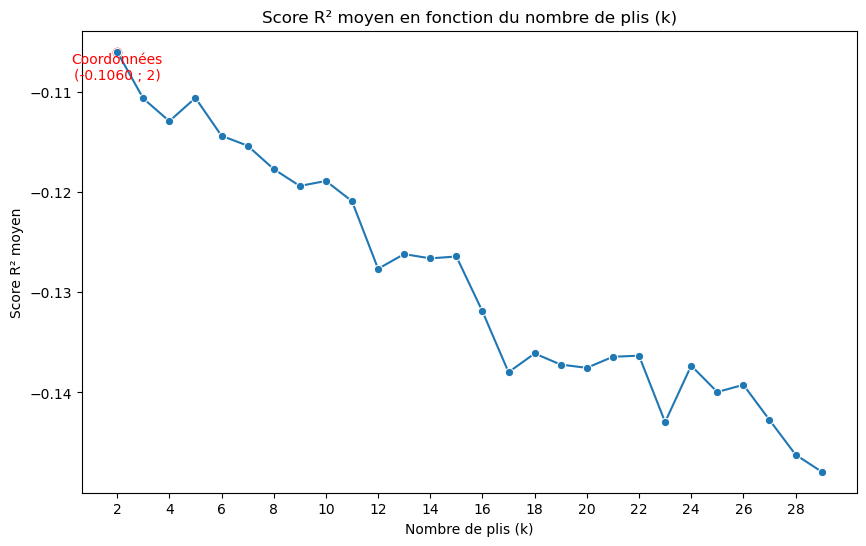

In [38]:
cross_val_r2 = cross_val_score(pipeline_svm, X, y, scoring='r2', cv=max_coords[0])
max_coords = cross_validation(pipeline_svm)

In [39]:
model_info(pipeline_svm)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=2): [-0.11497614 -0.08991369 -0.10831698 -0.15470807 -0.23371111 -0.10830846
 -0.17251918 -0.11289934 -0.16138611 -0.18924741 -0.09940163 -0.13954798
 -0.07363168 -0.08641731 -0.05259033 -0.20404074 -0.13405766 -0.3229889
 -0.04850119]
Score R² moyen (k=2): -0.1372191520789192


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.5298941183698103
Le score R2 est 0.8302985037396592


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 1.1051147306166769
Le score R2 est 0.441414239211933


In [40]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_svm = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, scoring='r2', cv=max_coords[0])
grid_search_svm.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_svm = grid_search_svm.best_params_
print(f'Best Hyperparameters for SVM: {best_params_svm}')

Best Hyperparameters for SVM: {'svm__C': 10.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [41]:
model_summary('SVM', pipeline_svm,'C: 1.0, gamma: scale, kernel: rbf' )

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.324233,1.277442,0.743057,0.005352
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0,9}",0.456884,0.943501,0.686885,0.004971
2,SVM,"C: 1.0, gamma: scale, kernel: rbf",0.441414,1.105115,0.573518,0.020617


## GradientBoosting

### Encodage

In [42]:
X = data_model_2.drop(['SiteEnergyUse(kBtu)'], axis=1)
y = data_model_2[['SiteEnergyUse(kBtu)']]
X, y = shuffle(X, y)

In [43]:
# Colonnes catégorielles
categorical_columns = col_model_2_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), col_model_2_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_2_categoriel),
    ],
    remainder='passthrough'
)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

In [45]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [46]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [47]:
# Créer le pipeline
pipeline_gradient = Pipeline([
    ('preprocessor', preprocessor),
    ('gradient', GradientBoostingRegressor(n_estimators=150, learning_rate= 0.1,  max_depth=3, random_state=0) )])

# Modèle SVM
pipeline_gradient.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_gradient.predict(X_test)

In [48]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

### Optimisation

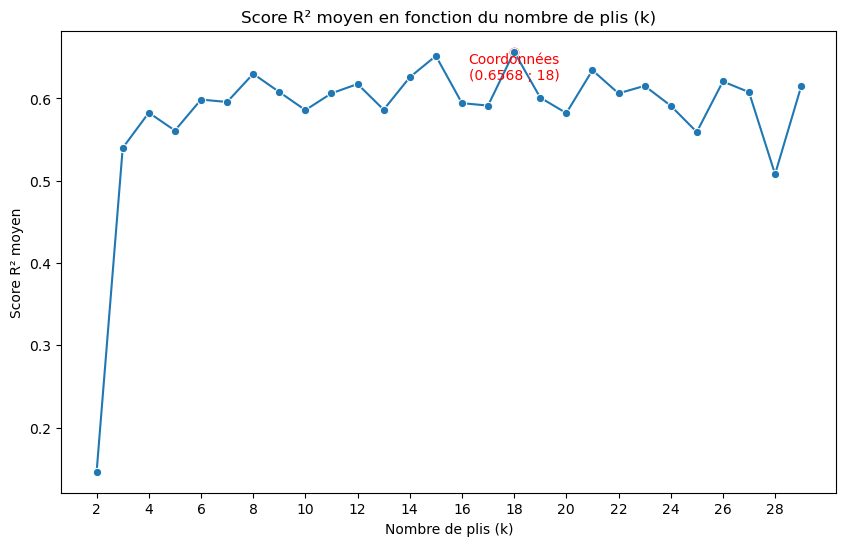

In [49]:
cross_val_r2 = cross_val_score(pipeline_gradient, X, y, scoring='r2', cv=max_coords[0])
max_coords = cross_validation(pipeline_gradient)

In [50]:
model_info(pipeline_gradient)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=18): [ 0.41598676 -0.12310382]
Score R² moyen (k=18): 0.14644146866260038


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.49537077069128876
Le score R2 est 0.863936352961409


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.644574766448898
Le score R2 est 0.738582539667543


In [51]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_gradient = {
    'gradient__n_estimators': [10, 50, 100, 150],
    'gradient__learning_rate': [0.01, 0.05, 0.1],
    'gradient__max_depth': [3, 4, 5],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_gradient = GridSearchCV(estimator=pipeline_gradient, param_grid=param_grid_gradient, scoring='r2', cv=max_coords[0])
grid_search_gradient.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_gradient = grid_search_gradient.best_params_
print(f'Best Hyperparameters for Gradient Boosting: {best_params_gradient}')

Best Hyperparameters for Gradient Boosting: {'gradient__learning_rate': 0.1, 'gradient__max_depth': 3, 'gradient__n_estimators': 150}


In [52]:
model_summary('GradientBoosting', pipeline_gradient,'learning_rate: 0.1, max_depth: 3, n_estimators: 150' )

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.324233,1.277442,0.743057,0.005352
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0,9}",0.456884,0.943501,0.686885,0.004971
2,SVM,"C: 1.0, gamma: scale, kernel: rbf",0.441414,1.105115,0.573518,0.020617
3,GradientBoosting,"learning_rate: 0.1, max_depth: 3, n_estimators...",0.738583,0.644575,0.480096,0.004946


## RandomForest

### Encodage

In [53]:
X = data_model_2.drop(['SiteEnergyUse(kBtu)'], axis=1)
y = data_model_2[['SiteEnergyUse(kBtu)']]
X, y = shuffle(X, y)

In [54]:
# Colonnes catégorielles
categorical_columns = col_model_2_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_2_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_2_categoriel),
    ],
    remainder='passthrough'
)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

In [56]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [57]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [58]:
# Créer le pipeline
pipeline_randomforest = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor(n_estimators=200, random_state=0) )])

# Modèle SVM
pipeline_randomforest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_randomforest.predict(X_test)

In [59]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

### Optimisation

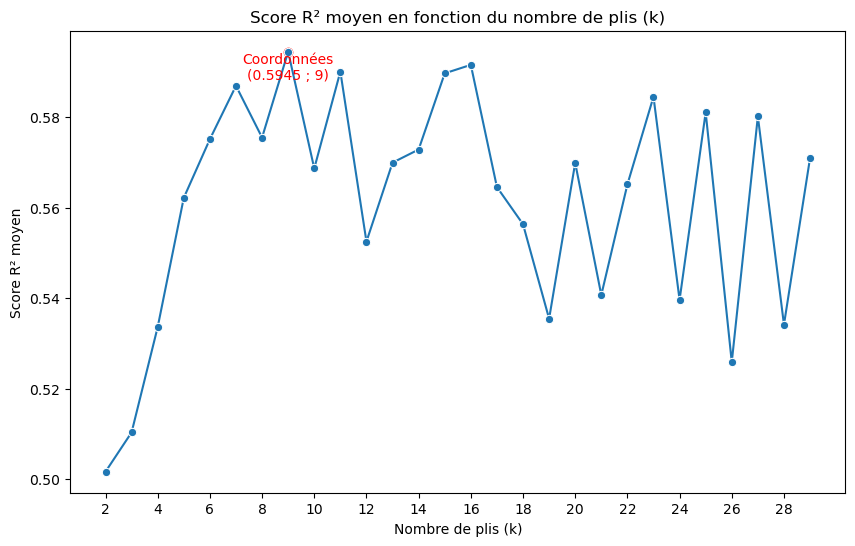

In [60]:
cross_val_r2 = cross_val_score(pipeline_randomforest, X, y, scoring='r2', cv=max_coords[0])
max_coords = cross_validation(pipeline_randomforest)

In [61]:
model_info(pipeline_randomforest)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=9): [0.09812574 0.70048682 0.3846805  0.69141123 0.78147582 0.66194425
 0.70806975 0.49699182 0.46773018 0.55969278 0.39385711 0.71300787
 0.55633042 0.80608577 0.21293809 0.65657789 0.63120618 0.4940139 ]
Score R² moyen (k=9): 0.5563681182669159


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.2993945626539861
Le score R2 est 0.9489391136990282


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.7064044314094371
Le score R2 est 0.7196327590207937


In [62]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_random = {
    'randomforest__n_estimators': [50, 100, 150, 200],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_random = GridSearchCV(estimator=pipeline_randomforest, param_grid=param_grid_random, scoring='r2', cv=max_coords[0])
grid_search_random.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_random = grid_search_random.best_params_
print(f'Best Hyperparameters for Gradient Boosting: {best_params_random}')

Best Hyperparameters for Gradient Boosting: {'randomforest__n_estimators': 200}


In [63]:
model_summary('RandomForest', pipeline_randomforest,'n_estimators: 200' )

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.324233,1.277442,0.743057,0.005352
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0,9}",0.456884,0.943501,0.686885,0.004971
2,SVM,"C: 1.0, gamma: scale, kernel: rbf",0.441414,1.105115,0.573518,0.020617
3,GradientBoosting,"learning_rate: 0.1, max_depth: 3, n_estimators...",0.738583,0.644575,0.480096,0.004946
4,RandomForest,n_estimators: 200,0.719633,0.706404,0.528923,0.014429


## Feature Importance

  0%|          | 0/290 [00:00<?, ?it/s]

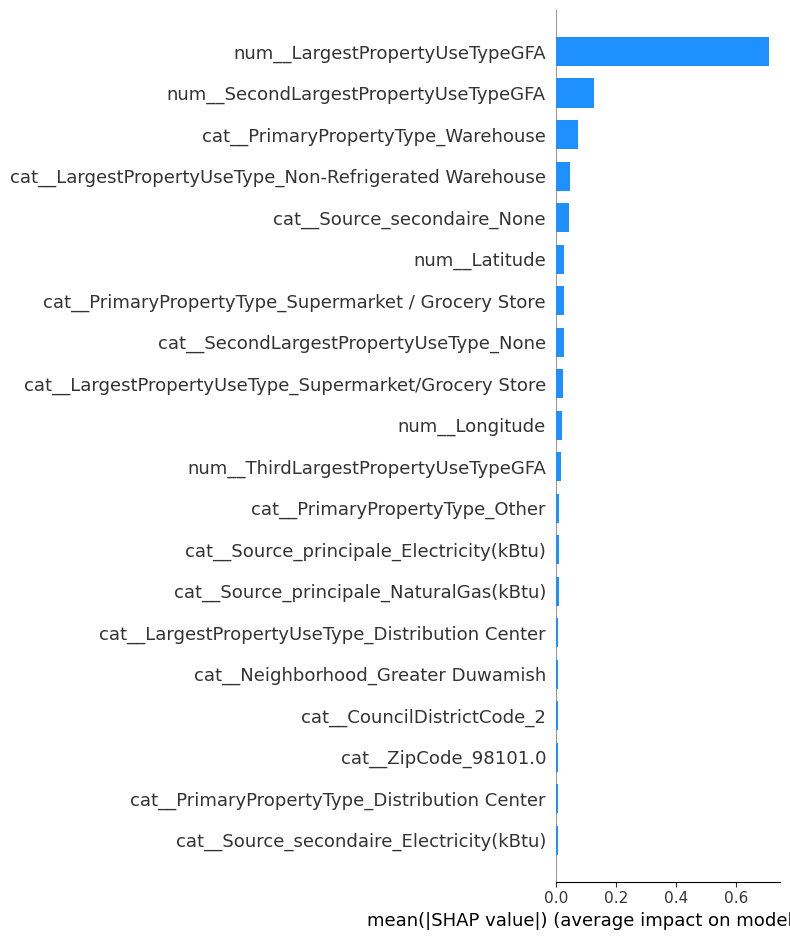

In [64]:
# Appliquer le préprocesseur et transformer les données d'entraînement
X_train_processed = preprocessor.fit_transform(X_train)

# Aplatir y_train
y_train_flat = y_train.ravel()

# Initialiser le modèle RandomForest et le former sur les données prétraitées
randomforest = RandomForestRegressor()
randomforest.fit(X_train_processed, y_train_flat)

# Réduire le jeu de données avec kmeans (regroupement)
background_data = shap.kmeans(X_train_processed, 50) 

# Créer l'explainer SHAP avec le modèle RandomForest et les données prétraitées
explainer = shap.KernelExplainer(randomforest.predict, background_data, 
                                 feature_perturbation="correlation_dependent")

# Calculer les valeurs SHAP pour l'ensemble du jeu de test
shap_vals = explainer.shap_values(preprocessor.transform(X_test))

# Visualiser les valeurs SHAP
shap.summary_plot(shap_vals, preprocessor.transform(X_test),
                  feature_names=preprocessor.get_feature_names_out(),
                  plot_type="bar",
                  color="dodgerblue"
                  )